In [2]:
import importlib
import frengression
# importlib.reload(frengression)
from data_causl.data_causl import generate_data_causl
from frengression import *
device = torch.device('cpu')

In [3]:
n = 10000
n_te = 1000
nI = 1
nX = 1
nO = 1
nS= 1
p = nI+nX+nO+nS

df = generate_data_causl(n=n, nI =nI, nX= nX, nO = nO, nS = nS, ate = 2, beta_cov = 0, strength_instr = 3, strength_conf = 1, strength_outcome = 1)
z = torch.tensor(df[[f"X{i}" for i in range(1, p + 1)]].values, dtype=torch.float32)
# z = torch.tensor(df['X2'].values,dtype=torch.float32).view(-1, 1)
x = torch.tensor(df['A'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

df_te = generate_data_causl(n=n_te, nI =nI, nX= nX, nO = nO, nS = nS, ate = 2, beta_cov = 0, strength_instr = 3, strength_conf = 1, strength_outcome = 1)
z_te = torch.tensor(df_te[[f"X{i}" for i in range(1, p + 1)]].values, dtype=torch.float32)
# z = torch.tensor(df['X2'].values,dtype=torch.float32).view(-1, 1)
x_te = torch.tensor(df_te['A'].values, dtype=torch.float32).view(-1, 1)
y_te = torch.tensor(df_te['y'].values, dtype=torch.float32).view(-1, 1)

In [4]:
x = x.to(device)
y = y.to(device)
z = z.to(device)

x_te = x_te.to(device)
y_te = y_te.to(device)
z_te = z_te.to(device)

In [5]:
model = Frengression(x.shape[1], y.shape[1], z.shape[1], noise_dim=1, num_layer=3, hidden_dim=400, device=device)

In [7]:
model.train_xz(x, z, num_iters=500, print_every_iter=100)

Epoch 1: loss 1.9250, loss1 2.0279, loss2 0.2057
Epoch 100: loss 1.3814, loss1 2.7585, loss2 2.7543
Epoch 200: loss 1.3785, loss1 2.7597, loss2 2.7624
Epoch 300: loss 1.3804, loss1 2.7647, loss2 2.7686
Epoch 400: loss 1.3893, loss1 2.7616, loss2 2.7446
Epoch 500: loss 1.3891, loss1 2.7518, loss2 2.7255


In [8]:
model.train_y(x, z, y, num_iters=2000, lr=1e-4, print_every_iter=100)

Epoch 1: loss 2.3784,	loss_y 1.6063, 1.6318, 0.0509,	loss_eta 0.7721, 0.8039, 0.0637
Epoch 100: loss 1.2488,	loss_y 0.6816, 1.7932, 2.2232,	loss_eta 0.5672, 1.1687, 1.2030
Epoch 200: loss 1.5020,	loss_y 0.8270, 1.0972, 0.5405,	loss_eta 0.6750, 0.8610, 0.3719
Epoch 300: loss 1.2940,	loss_y 0.6821, 1.5312, 1.6983,	loss_eta 0.6119, 0.8892, 0.5545
Epoch 400: loss 1.4770,	loss_y 0.7620, 1.4321, 1.3402,	loss_eta 0.7149, 1.0195, 0.6092
Epoch 500: loss 1.6541,	loss_y 0.9283, 2.0230, 2.1895,	loss_eta 0.7258, 0.8146, 0.1776
Epoch 600: loss 1.3747,	loss_y 0.6999, 1.6377, 1.8755,	loss_eta 0.6748, 0.9658, 0.5819
Epoch 700: loss 1.3181,	loss_y 0.6329, 1.5597, 1.8536,	loss_eta 0.6853, 1.2271, 1.0837
Epoch 800: loss 1.3824,	loss_y 0.7363, 1.7859, 2.0991,	loss_eta 0.6461, 1.0587, 0.8253
Epoch 900: loss 1.1773,	loss_y 0.5649, 0.9644, 0.7989,	loss_eta 0.6123, 0.9804, 0.7361
Epoch 1000: loss 1.0977,	loss_y 0.5101, 1.0942, 1.1682,	loss_eta 0.5876, 1.2595, 1.3437
Epoch 1100: loss 1.3746,	loss_y 0.7866, 1.91

In [9]:
y_pred_causal = model.predict_causal(x_te, sample_size=1000)

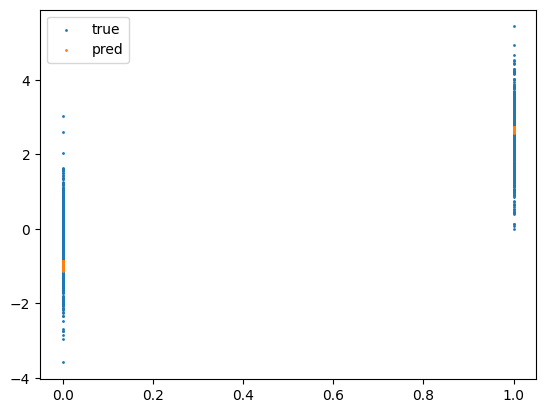

In [12]:
plt.scatter(x_te, y_te, s=1, label='true')
plt.scatter(x_te, y_pred_causal.cpu(), s=1, label='pred')
plt.legend(); plt.show()